In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

import pathlib
import random
import matplotlib as plt
import matplotlib.pyplot
import matplotlib.image

import os

In [ ]:
!pip install gdown

file_id = "1qIhtWhc5-vPYpVSOicU2LlPvRxXeckFq"
output_file = "garbageClassification.zip"

!gdown --id $file_id -O $output_file

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qIhtWhc5-vPYpVSOicU2LlPvRxXeckFq
To: /content/garbageClassification.zip
100% 386M/386M [00:10<00:00, 36.4MB/s]


In [ ]:
import zipfile

# Extract the archive
local_zip = './garbageClassification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/garbageClassification')
zip_ref.close()

In [ ]:
import os

base_dir = 'tmp/garbageClassification'

# kaleng, kertas, kardus, botol_plastik
kaleng_dir = os.path.join(base_dir, 'kaleng')
kertas_dir = os.path.join(base_dir, 'kertas')
kardus_dir = os.path.join(base_dir, 'kardus')
botol_plastik_dir = os.path.join(base_dir, 'botol_plastik')

print('total training cans images:', len(os.listdir(kaleng_dir)))
print('total training cardboard images:', len(os.listdir(kardus_dir)))
print('total training paper images:', len(os.listdir(kertas_dir)))
print('total training plastic_bottles images:', len(os.listdir(botol_plastik_dir)))

cans_files = os.listdir(kaleng_dir)
print(cans_files[:10])

paper_files = os.listdir(kertas_dir)
print(paper_files[:10])

cardboard_files = os.listdir(kardus_dir)
print(cardboard_files[:10])

plastic_bottles_files = os.listdir(botol_plastik_dir)
print(plastic_bottles_files[:10])

total training cans images: 1000
total training cardboard images: 1000
total training paper images: 1000
total training plastic_bottles images: 1000
['AluCan410.jpg', 'AluCan656.jpg', 'AluCan160.jpg', 'AluCan698.jpg', 'AluCan135.jpg', 'AluCan993.jpg', 'AluCan1,029.jpg', 'AluCan60.jpg', 'AluCan274.jpg', 'AluCan481.jpg']
['paper225.jpg', 'paper500.jpg', 'paper198.jpg', 'paper627.jpg', 'paper779.jpg', 'paper686.jpg', 'paper274.jpg', 'paper702.jpg', 'paper147.jpg', 'paper110.jpg']
['X5DUSCEFQV0X.jpg', '6JJYOCLHIE1F.jpg', 'cardboard90.jpg', 'cardboard103.jpg', 'cardboard387.jpg', 'cardboard617.jpg', 'cardboard612.jpg', 'cardboard154.jpg', 'DQTAEHT7IYTE.jpg', 'cardboard32.jpg']
['PET713.jpg', 'PET1,023.jpg', 'PET502.jpg', 'PET1,780.jpg', 'PET538.jpg', 'PET1,251.jpg', 'PET861.jpg', 'PET749.jpg', 'PET567.jpg', 'PET834.jpg']


In [ ]:
import shutil

# Define root directory
root_dir = 'data/'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# create_train_val_dirs
def create_train_val_dirs(root_path):

  os.makedirs(os.path.join(root_path, 'training'))
  os.makedirs(os.path.join(f'{root_path}/training', 'kaleng'))
  os.makedirs(os.path.join(f'{root_path}/training', 'kertas'))
  os.makedirs(os.path.join(f'{root_path}/training', 'kardus'))
  os.makedirs(os.path.join(f'{root_path}/training', 'botol_plastik'))
  os.makedirs(os.path.join(root_path, 'validation'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'kaleng'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'kertas'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'kardus'))
  os.makedirs(os.path.join(f'{root_path}/validation', 'botol_plastik'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test create_train_val_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

data/validation
data/training
data/validation/botol_plastik
data/validation/kaleng
data/validation/kardus
data/validation/kertas
data/training/botol_plastik
data/training/kaleng
data/training/kardus
data/training/kertas


In [ ]:
from shutil import copyfile

# split_data
def split_data(source_dir, training_dir, validation_dir, split_size):

    # Shuffle list
  shuffled_source = random.sample(os.listdir(source_dir), len(os.listdir(source_dir)))

  # Find total number of files in training dir
  training_number = int(len(shuffled_source) * split_size)

  i = 0
  target = training_dir

  for item in shuffled_source:
    item_source = os.path.join(source_dir, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      copyfile(item_source, os.path.join(target, item))
    i += 1

    # Switch copy target to VALIDATION_DIR
    if i == training_number:
      target = validation_dir

In [ ]:
# Test your split_data function

# Define paths
kardus_source_dir = "tmp/garbageClassification/kardus"
botol_plastik_source_dir = "tmp/garbageClassification/botol_plastik"
kaleng_source_dir = "tmp/garbageClassification/kaleng"
kertas_source_dir = "tmp/garbageClassification/kertas"

training_dir = "data/training"
validation_dir = "data/validation"

training_kardus_dir = os.path.join(training_dir, "kardus/")
validation_kardus_dir = os.path.join(validation_dir, "kardus/")

training_botol_plastik_dir = os.path.join(training_dir, "botol_plastik/")
validation_botol_plastik_dir = os.path.join(validation_dir, "botol_plastik/")

training_kaleng_dir = os.path.join(training_dir, "kaleng/")
validation_kaleng_dir = os.path.join(validation_dir, "kaleng/")

training_kertas_dir = os.path.join(training_dir, "kertas/")
validation_kertas_dir = os.path.join(validation_dir, "kertas/")

In [ ]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(training_kardus_dir)) > 0:
  for file in os.scandir(training_kardus_dir):
    os.remove(file.path)
if len(os.listdir(training_botol_plastik_dir)) > 0:
  for file in os.scandir(training_botol_plastik_dir):
    os.remove(file.path)
if len(os.listdir(training_kaleng_dir)) > 0:
  for file in os.scandir(training_kaleng_dir):
    os.remove(file.path)
if len(os.listdir(training_kertas_dir)) > 0:
  for file in os.scandir(training_kertas_dir):
    os.remove(file.path)


if len(os.listdir(validation_kardus_dir)) > 0:
  for file in os.scandir(validation_kardus_dir):
    os.remove(file.path)
if len(os.listdir(validation_botol_plastik_dir)) > 0:
  for file in os.scandir(validation_botol_plastik_dir):
    os.remove(file.path)
if len(os.listdir(validation_kaleng_dir)) > 0:
  for file in os.scandir(validation_kaleng_dir):
    os.remove(file.path)
if len(os.listdir(validation_kertas_dir)) > 0:
  for file in os.scandir(validation_kertas_dir):
    os.remove(file.path)

In [ ]:
split_size = .8

In [ ]:
# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(kardus_source_dir, training_kardus_dir, validation_kardus_dir, split_size)
split_data(botol_plastik_source_dir, training_botol_plastik_dir, validation_botol_plastik_dir, split_size)
split_data(kaleng_source_dir, training_kaleng_dir, validation_kaleng_dir, split_size)
split_data(kertas_source_dir, training_kertas_dir, validation_kertas_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original kardus directory has {len(os.listdir(kardus_source_dir))} images")
print(f"Original botol plastik directory has {len(os.listdir(botol_plastik_source_dir))} images")
print(f"Original kaleng directory has {len(os.listdir(kaleng_source_dir))} images")
print(f"Original kertas directory has {len(os.listdir(kertas_source_dir))} images")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(training_kardus_dir))} images of kardus for training")
print(f"There are {len(os.listdir(training_botol_plastik_dir))} images of botol plastik for training")
print(f"There are {len(os.listdir(training_kaleng_dir))} images of kaleng for training")
print(f"There are {len(os.listdir(training_kertas_dir))} images of kertas for training")

print(f"There are {len(os.listdir(validation_kardus_dir))} images of kardus for validation")
print(f"There are {len(os.listdir(validation_botol_plastik_dir))} images of botol plastik for validation")
print(f"There are {len(os.listdir(validation_kaleng_dir))} images of kaleng for validation")
print(f"There are {len(os.listdir(validation_kertas_dir))} images of kertas for validation")

Original kardus directory has 1000 images
Original botol plastik directory has 1000 images
Original kaleng directory has 1000 images
Original kertas directory has 1000 images
There are 800 images of kardus for training
There are 800 images of botol plastik for training
There are 800 images of kaleng for training
There are 800 images of kertas for training
There are 200 images of kardus for validation
There are 200 images of botol plastik for validation
There are 200 images of kaleng for validation
There are 200 images of kertas for validation


In [ ]:
training_dir = "data/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "data/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(280,280),
	class_mode='categorical',
  batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(280,280),
	class_mode='categorical',
  batch_size=128
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(280, 280, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 278, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 139, 139, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 137, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 68, 68, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 33, 33, 64)        0

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/20
25/25 [==============================] - 82s 3s/step - loss: 1.4415 - accuracy: 0.4431 - val_loss: 0.9827 - val_accuracy: 0.6445
Epoch 2/20
25/25 [==============================] - 75s 3s/step - loss: 0.7749 - accuracy: 0.6988 - val_loss: 0.7559 - val_accuracy: 0.6719
Epoch 3/20
25/25 [==============================] - 73s 3s/step - loss: 0.6537 - accuracy: 0.7425 - val_loss: 0.6969 - val_accuracy: 0.7487
Epoch 4/20
25/25 [==============================] - 73s 3s/step - loss: 0.5363 - accuracy: 0.7931 - val_loss: 0.6062 - val_accuracy: 0.7695
Epoch 5/20
25/25 [==============================] - 77s 3s/step - loss: 0.5042 - accuracy: 0.8037 - val_loss: 0.6203 - val_accuracy: 0.7852
Epoch 6/20
25/25 [==============================] - 73s 3s/step - loss: 0.5623 - accuracy: 0.7844 - val_loss: 0.4896 - val_accuracy: 0.8177
Epoch 7/20
25/25 [==============================] - 74s 3s/step - loss: 0.4335 - accuracy: 0.8391 - val_loss: 0.3810 - val_accuracy: 0.8451
Epoch 8/20
25/25 [==

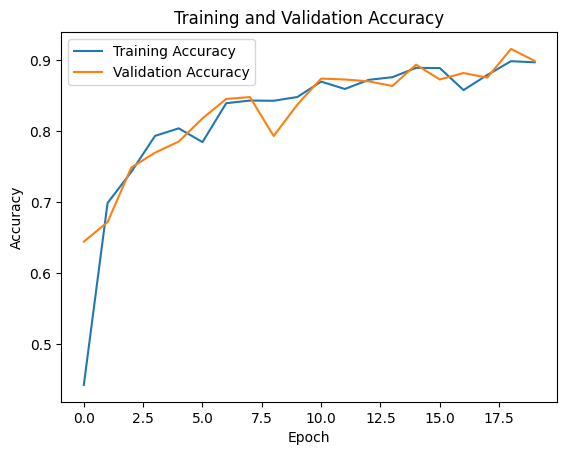

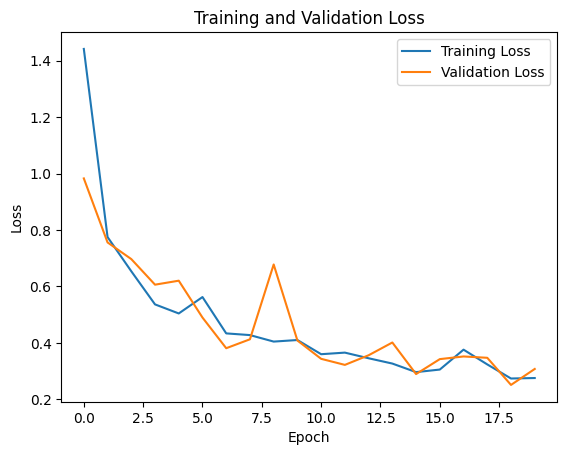

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

7/7 [==============================] - 4s 518ms/step - loss: 0.2485 - accuracy: 0.9175

Test accuracy: 0.9175000190734863

Test loss: 0.2485032081604004


In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

8954232

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>